# DATA ANALYSIS AND FORECASTING FOR WALMART SALES DATASET

Predicting future sales for a company is one of the most important aspects of strategic planning.

I analyzed Walmart's weekly sales data to gain insights into the performance of their stores. The dataset contains information about weekly sales, temperature, fuel price, CPI (Consumer Price Index), and unemployment for 45 Walmart stores located in different regions. My goal is to use data-driven techniques to uncover patterns and relationships between these variables to aid in making data-driven decisions.

I performed exploratory data analysis (EDA) to gain a better understanding of the dataset. Then I used time series analysis(ARIMA) to understand the underlying patterns and trends in the data and time series forecasting techniques to predict future sales .And then used FB Prophet library for more accurate prediction results and Finally, I used regression analysis to identify the variables that had the most impact on weekly sales.

In [ ]:
#import all important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read csv data file
from google.colab import files
uploaded = files.upload()

Saving Walmart_Store_sales.csv to Walmart_Store_sales.csv


In [ ]:
# Checking the first few rows and dimension of the dataset
df = pd.read_csv(io.BytesIO(uploaded['Walmart_Store_sales.csv']))
print('Shape of Data',df.shape)
df.head()

Shape of Data (6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis (EDA) is the process of examining and analyzing the dataset in order to extract useful information and identify patterns and relationships between variables. EDA typically involves visually inspecting the data through techniques such as lineplot,pairplot,heatmap, histograms,barplot,distplot,jointplot,pieplot, scatter plots, and box plots to gain insights into its characteristics, distribution, and outliers. The goal of EDA is to better understand the data and prepare it for further analysis.

Description of the Columns:
    
Store : the store number
    
Date : the week of sales.
    
Weekly_Sales : the weekly sales for the given store.
    
Holiday_Flag : whether the week is a special holiday week or not (1 = holiday week; 0 = non-holiday week).
    
Temperature : average temperature in the region for the given week.
    
Fuel_Price : cost of fuel in the region for the given week.
    
CPI : the consumer price index for the given week.
    
Unemployment : the unemployment rate for the region for the given week

In [ ]:
# Checking for missing value of the columns
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
# Checking the complete information(data type,missing value count) of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
#checking no of unique category  in every column
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

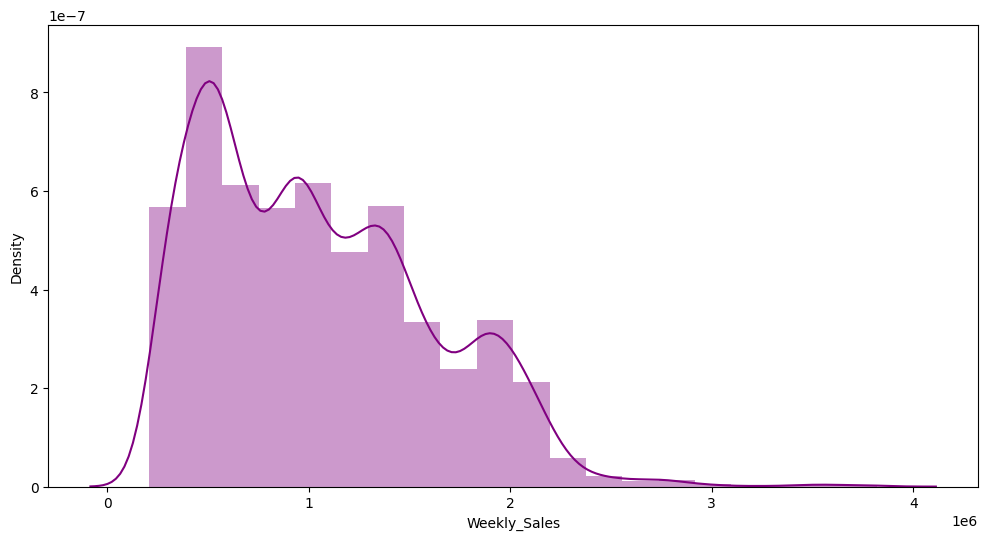

In [ ]:
# Visualizing the distribution of the Weekly Sales variable

plt.figure(figsize = (12,6))
sns.distplot(df['Weekly_Sales'],bins=20,color='purple')

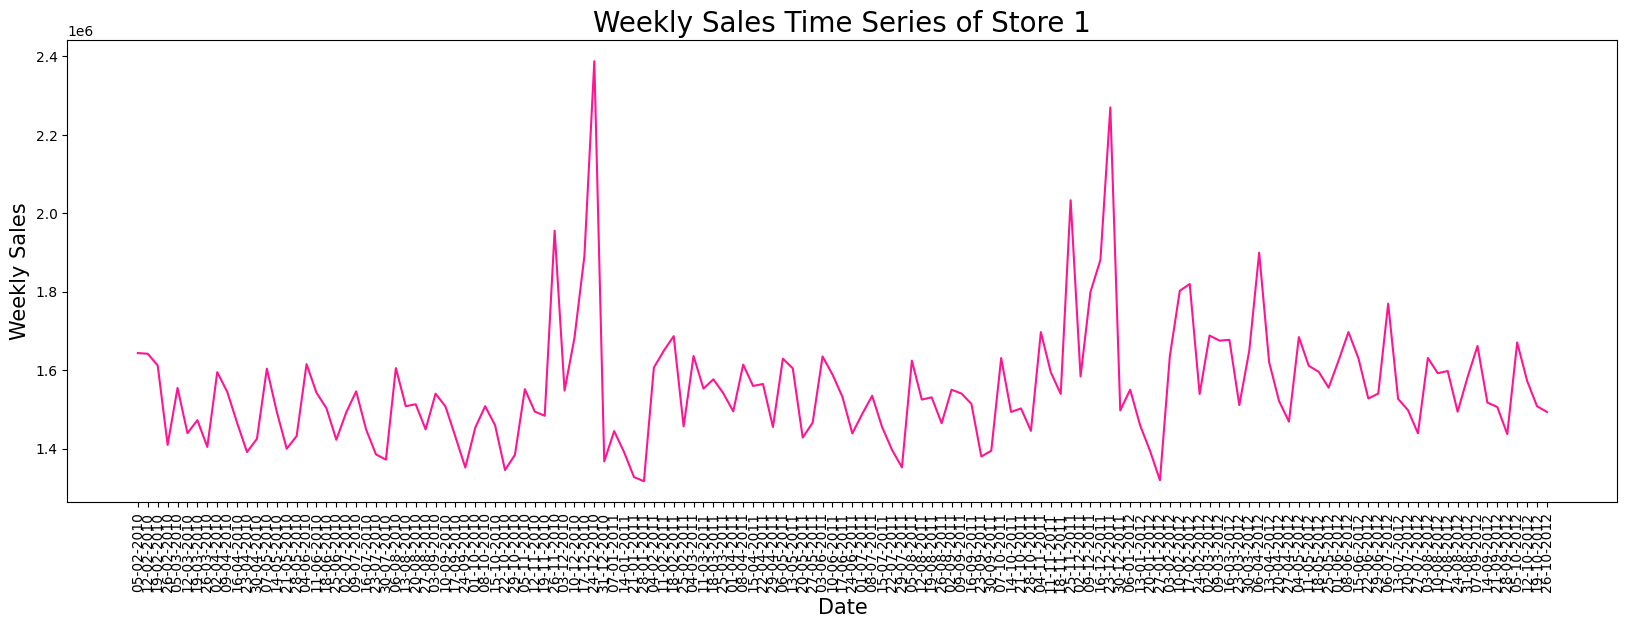

In [ ]:
# Visualizing the trend of Weekly Sales over time for a single store

plt.figure(figsize=(20, 6))
store1_df = df[df['Store'] == 1]
sns.lineplot(x='Date', y='Weekly_Sales', data=store1_df,color ='deeppink')
plt.title('Weekly Sales Time Series of Store 1',fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Weekly Sales',fontsize = 15)
plt.xticks(rotation=90, fontsize = 10)  # Rotate the x-axis labels by 90 degrees
plt.show()

In [ ]:
#Checking no of holidays and working days()[1= holiday week, 0= working week]
df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

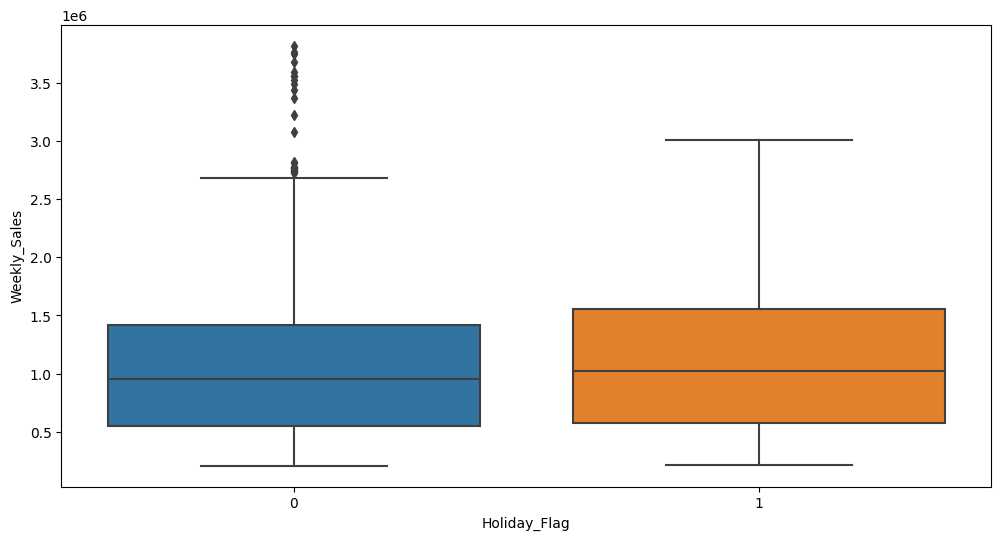

In [ ]:
# Checking for outliers or unusual observations in the data
plt.figure(figsize = (12,6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.show()

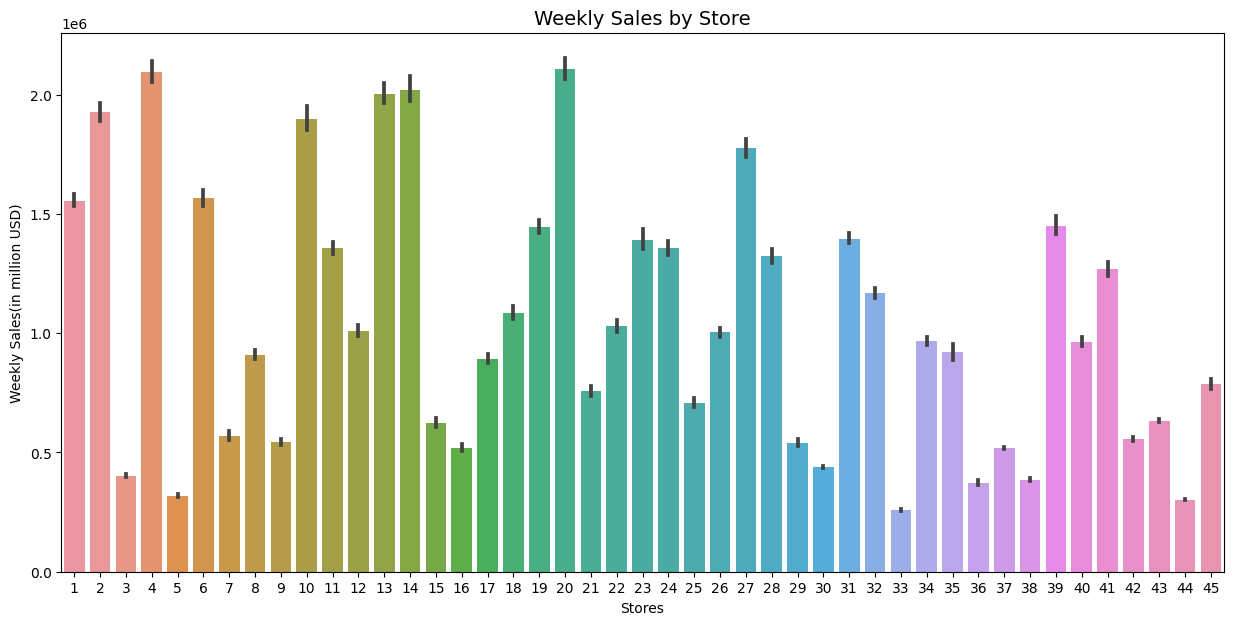

In [ ]:
# Visualizing the average Weekly Sales by store

plt.figure(figsize = (15,7))
sns.barplot(x='Store',y='Weekly_Sales',data=df)
plt.title('Weekly Sales by Store',fontsize=14)
plt.xlabel('Stores')
plt.ylabel('Weekly Sales(in million USD)')
plt.show()                                      # This code creates a bar plot to visualize the average weekly sales for each
                                                # store in the dataset. The x-axis represents the store number, the y-axis
                                                #  represents the average weekly sales for that store

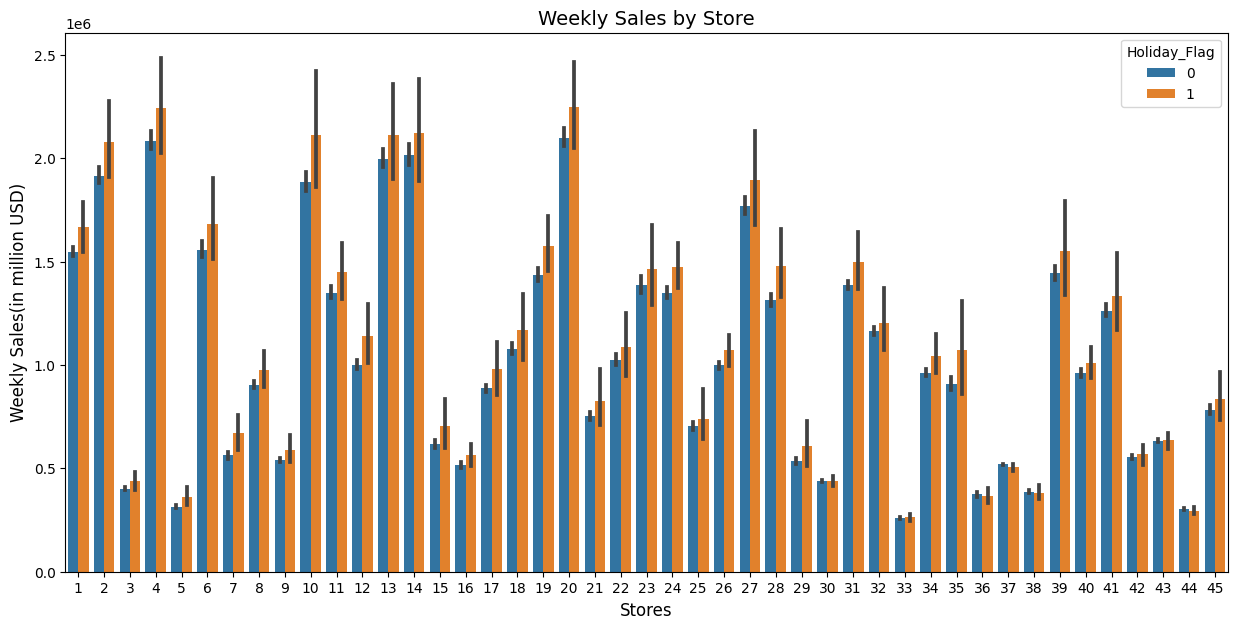

In [ ]:
# Visualizing the average Weekly Sales by store and holiday flag

plt.figure(figsize = (15,7))
sns.barplot(x='Store',y='Weekly_Sales',hue ='Holiday_Flag',data=df)
plt.title('Weekly Sales by Store',fontsize=14)
plt.xlabel('Stores',fontsize=12)
plt.ylabel('Weekly Sales(in million USD)',fontsize=12)

                                                       # This code creates a bar plot to visualize the average weekly sales for
                                  # each store in the dataset,grouped by holiday flag . The x-axis represents the store number,
                                  # the y-axis represents the average weekly sales for that store  and the hue parameter is
                                  # set to the holiday flag. This means that bars of different colors will be plotted for
                                  # each store, depending on whether the week contains a holiday or not.
plt.show()

CORRELATION (Visualize through Heatmap)

By examining the heatmap, we can identify any strong correlations between the variables. The correlation coefficient ranges from -1 to 1, where a value of 1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation.

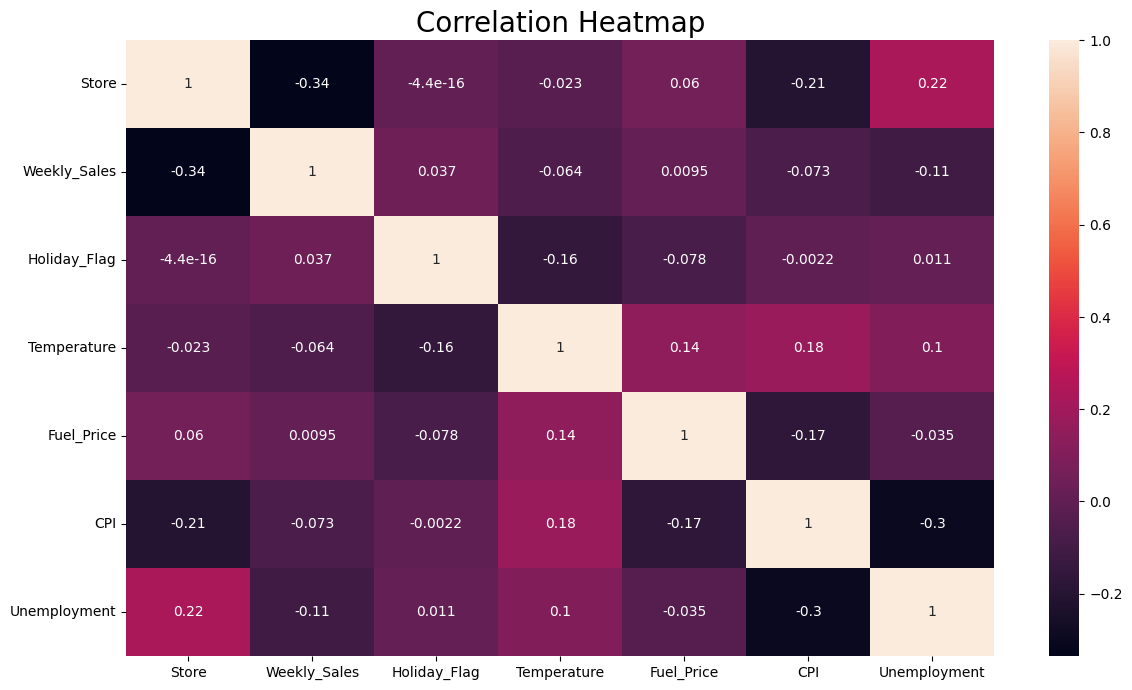

In [ ]:
# Visualizing the correlation between variables
plt.figure(figsize =(14,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap',fontsize=20)
plt.show()

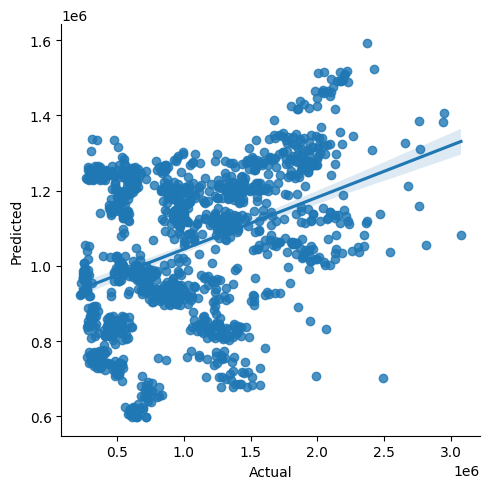

In [ ]:
sns.lmplot(x='Actual',y='Predicted',data=DF)

In [ ]:
# Adding one more colum week to the dataset
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df['Date'].dt.week
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,18


<Axes: xlabel='Week', ylabel='Weekly_Sales'>

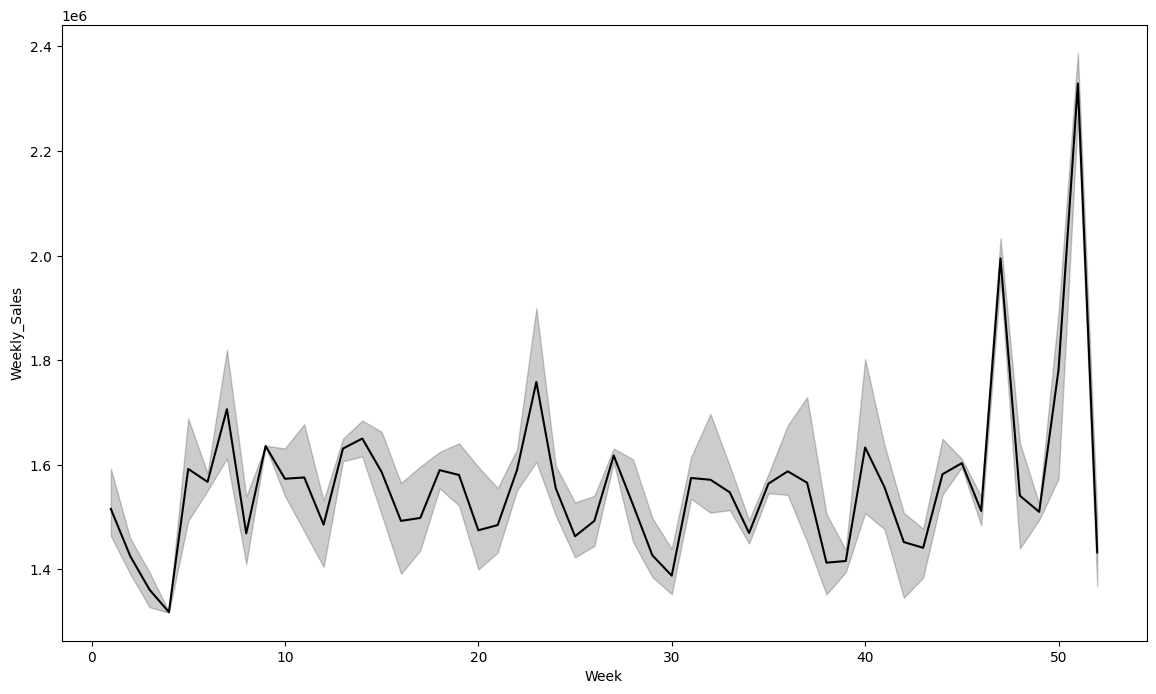

In [ ]:
# Visualizing the trend of Weekly Sales over time of every week for store no 1

store1_df = df[df['Store'] == 1]
plt.figure(figsize =(14,8))
sns.lineplot(x='Week', y='Weekly_Sales', data=store1_df,color ='black')

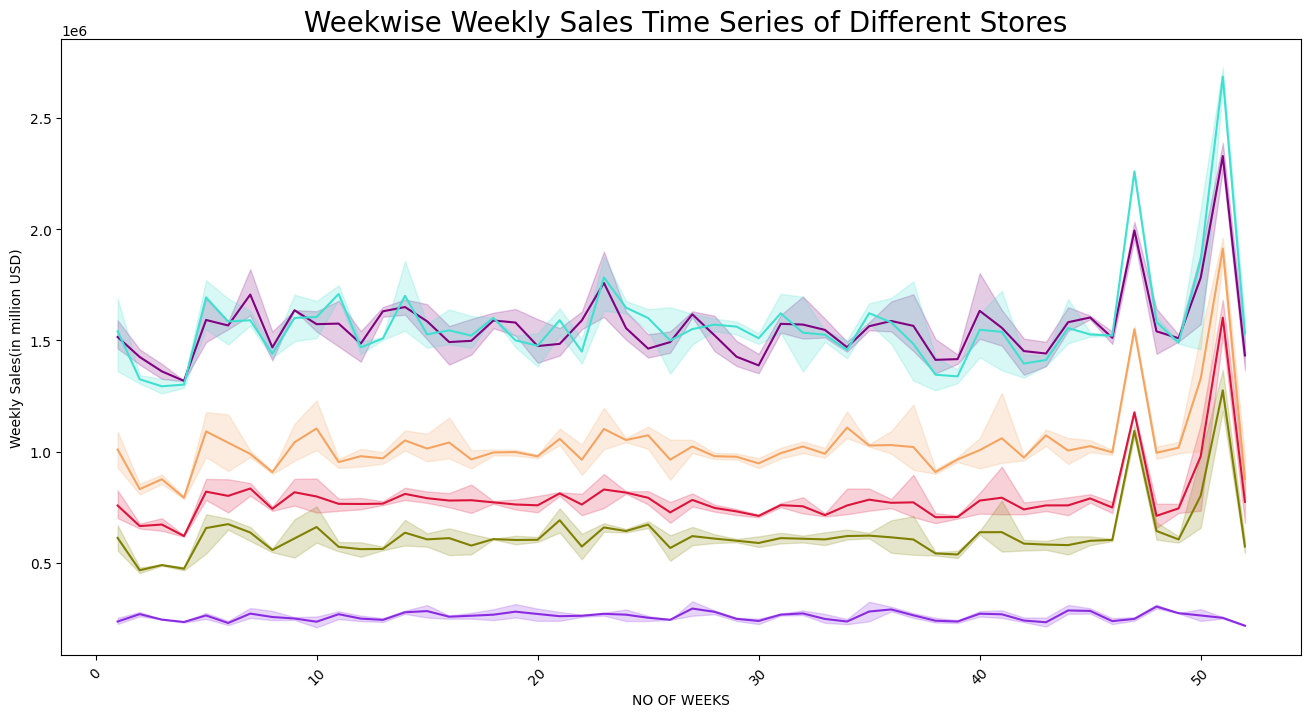

In [ ]:
# Visualizing the trend of Weekly Sales over time of every week for different stores

plt.figure(figsize=(16, 8))
store33_df = df[df['Store'] == 33]
store45_df = df[df['Store'] == 45]
store6_df = df[df['Store'] == 6]
store15_df = df[df['Store'] == 15]
store22_df = df[df['Store'] == 22]
store1_df = df[df['Store'] == 1]
sns.lineplot(x='Week', y='Weekly_Sales', data=store1_df,color ='purple')
sns.lineplot(x='Week', y='Weekly_Sales', data=store33_df,color ='blueviolet')
sns.lineplot(x='Week', y='Weekly_Sales', data=store45_df,color ='crimson')
sns.lineplot(x='Week', y='Weekly_Sales', data=store6_df,color ='turquoise')
sns.lineplot(x='Week', y='Weekly_Sales', data=store15_df,color ='olive')
sns.lineplot(x='Week', y='Weekly_Sales', data=store22_df,color ='sandybrown')
plt.title(' Weekwise Weekly Sales Time Series of Different Stores',fontsize = 20)
plt.xlabel('NO OF WEEKS')
plt.ylabel('Weekly Sales(in million USD)')
plt.xticks(rotation=45, fontsize = 10)         # Rotate the x-axis labels by 90 degrees
plt.show()

This shows an interesting trend during all weeks (more spikes in between 40th and 50th week). The best thing is all the stores have almost the same trends and spike just the magnitude is different.This clearly tells its a timeseries problem.

# Time Series Analysis

Time series analysis is a statistical technique used to analyze and model time-dependent data. It involves studying the patterns(trends,Seasonality,Cyclicity,Irregularities)means relationships between data points over time to uncover underlying structures and make predictions about future values.

.Trend --> Trend represent the change in dependent variables with respect to time from start to end. In case of increasing trend dependent variable will increase with time and vice versa. It's not necessary to have definite trend in time series, we can have a single time series with increasing and decreasing trend. In short trend represent the varying mean of time series data.

.Seasonality--> If observations repeats after fixed time interval then they are referred as seasonal observations. These seasonal changes in data can occur because of natural events or man-made events. For example every year warm cloths sales increases just before winter season. So seasonality represent the data variations at fixed intervals.

.Cyclicity--> Cyclicity occurs when observations in the series repeats in random pattern. Note that if there is any fixed pattern then it becomes seasonality, in case of cyclicity observations may repeat after a week, months or may be after a year. These kinds of patterns are much harder to predict.

.Irregularities--> This is also called as noise. Strange dips and jump in the data are called as irregularities. These fluctuations are caused by uncontrollable events like earthquakes, wars, flood, pandemic etc. For example because of COVID-19 pandemic there is huge demand for hand sanitizers and masks.

I performed time series analysis on the weekly sales data. The time series is decomposed into trend, seasonal, and residual components using the seasonal decompose function. The stationarity of the time series is checked using the Augmented Dickey-Fuller(ADF) test. Finally, an ARIMA model is fit to the time series data and used to make predictions for the next 12 weeks.

In [ ]:
# set dataset time according to the Time series Analysis
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df= df.drop(columns=['Store','Holiday_Flag', 'Temperature','Fuel_Price', 'CPI', 'Unemployment'])
df=df.dropna()
df


,Weekly_Sales,Week
Date,,
2010-05-02,1643690.90,17
2010-12-02,1641957.44,48
2010-02-19,1611968.17,7
2010-02-26,1409727.59,8
2010-05-03,1554806.68,18
...,...,...
2012-09-28,713173.95,39
2012-05-10,733455.07,19
2012-12-10,734464.36,50


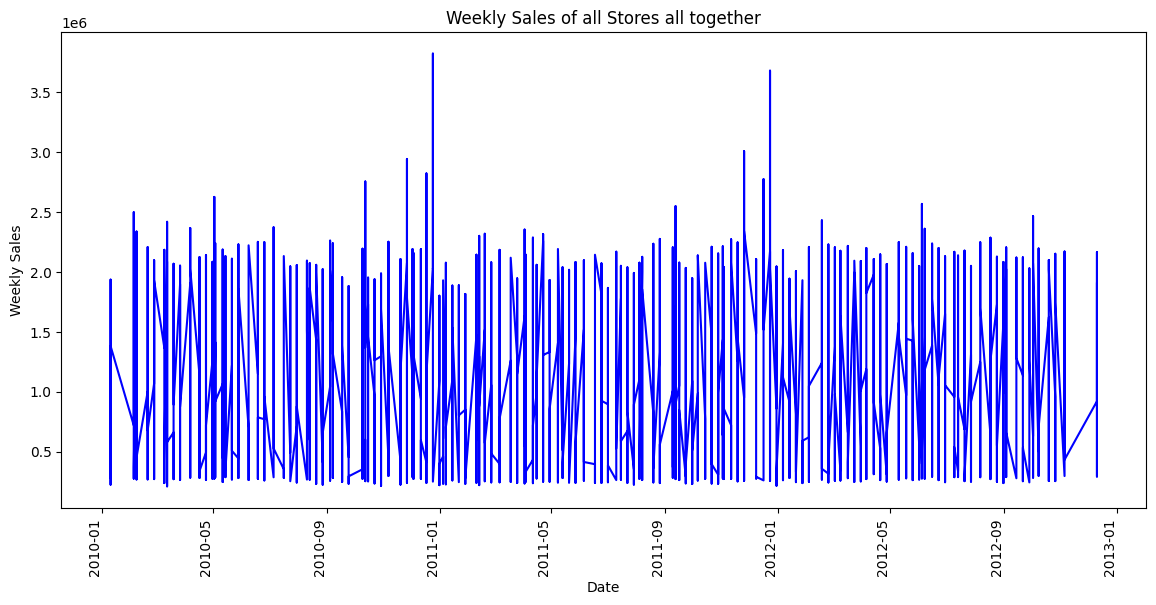

In [ ]:
df['Weekly_Sales'].plot(figsize=(14,7),color='blue')
plt.title('Weekly Sales of all Stores all together')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=90, fontsize = 10)  # Rotate the x-axis labels by 90 degrees
plt.show()

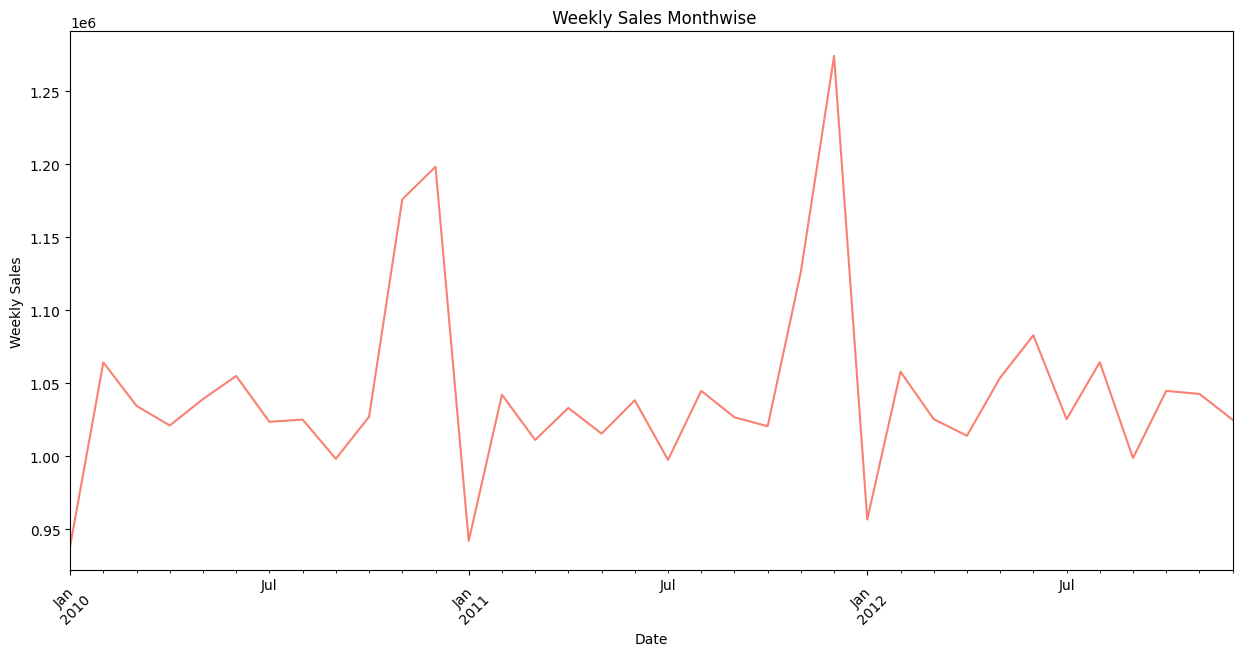

In [ ]:
# Checking for seasonality or trends in the data through tune frequency on monthly basis

df.resample('M').mean()['Weekly_Sales'].plot(figsize = (15,7),color='salmon')
plt.title(' Weekly Sales Monthwise')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45, fontsize = 10)
plt.show()
plt.show()

This shows an interesting trend during year ends (during both 2011 & 2012). The best thing is all the stores have almost the same trends and spike just the magnitude is different.This clearly tells its a timeseries problem.


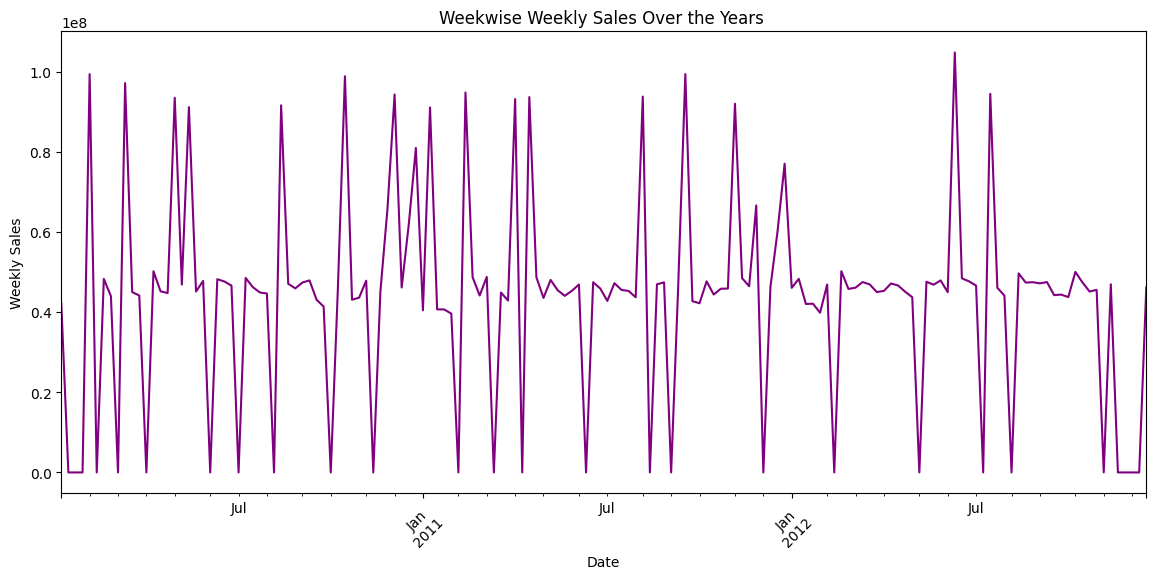

In [ ]:
df = df.resample('W').sum()
df['Weekly_Sales'].plot(figsize=(14, 6),color='purple')
plt.title('Weekwise Weekly Sales Over the Years ')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45, fontsize = 10)  # Rotate the x-axis labels by 90 degrees
plt.show()

Not quite a trend. Here comes yet another component of timeseries - Irregular component
which are other non random sources of variations of series and are mainly the impact of random events such as strikes, earthquakes, and sudden changes in the weather. By their nature, these effects are completely unpredictable.

<Axes: xlabel='Date'>

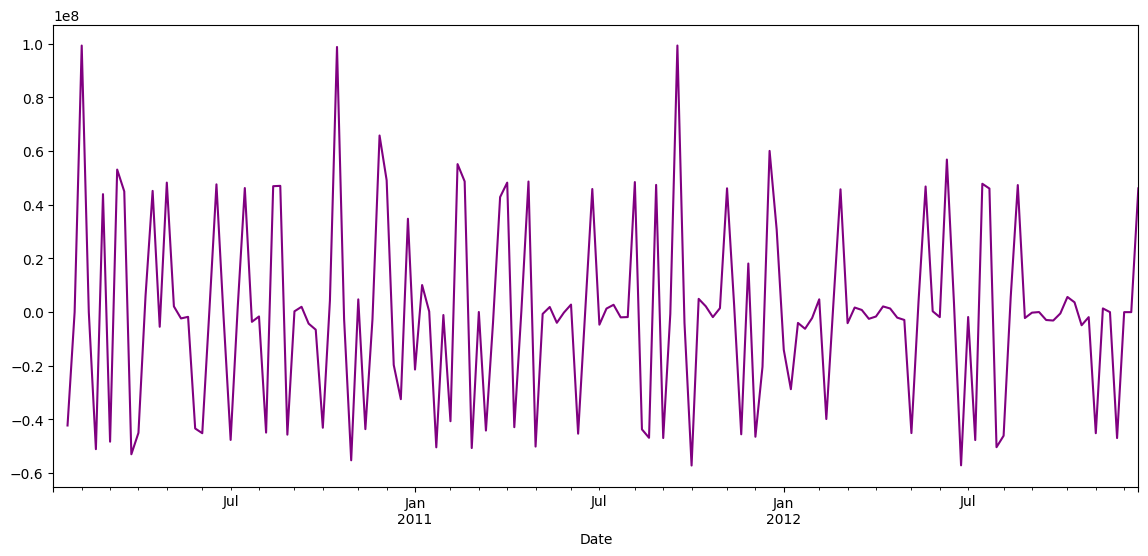

In [ ]:
df['seasonal_differencing']=df['Weekly_Sales']-df['Weekly_Sales'].shift(2)
df['seasonal_differencing'].plot(figsize=(14, 6),color='purple')

Time Series Decomposition

Time series decomposition helps to deconstruct the time series into several component like trend and seasonality for better visualization of its characteristics. Using time-series decomposition makes it easier to quickly identify a changing mean or variation in the data.

.Additive Decomposition

An additive model suggests that the components are added together.
An additive model is linear where changes over time are consistently made by the same amount.
A linear seasonality has the same frequency (width of the cycles) and amplitude (height of the cycles).
The statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called seasonal_decompose().we need to specify whether the model is additive or multiplicative.

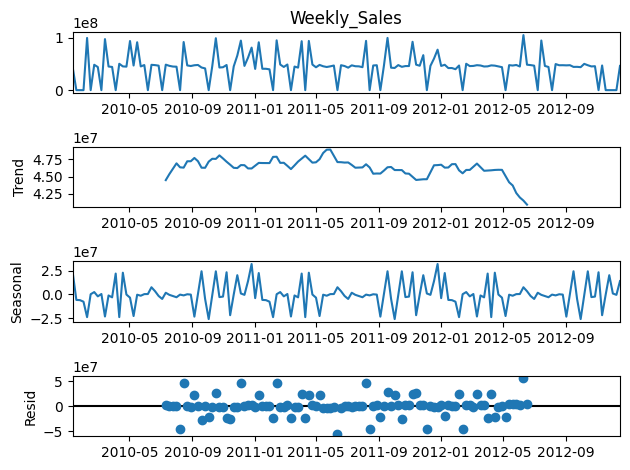

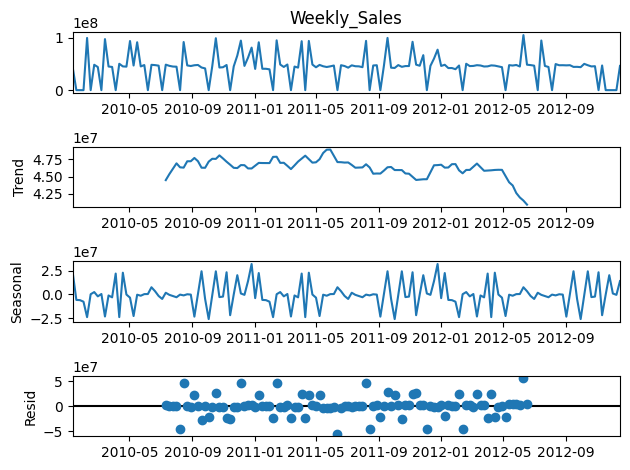

In [ ]:
# Resample the data to a weekly frequency
from statsmodels.tsa.seasonal import seasonal_decompose


# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(df['Weekly_Sales'], model='additive')
decomposition.plot()
#trend = decomposition.trend
#seasonal = decomposition.seasonal
#residual = decomposition.resid

# Augmented Dickey-Fuller(ADF) test
The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a time series is stationary or not. Stationarity is an important concept in time series analysis, which implies that the statistical properties of the series remain constant over time, such as the mean, variance, and autocorrelation.

The ADF test outputs a test statistic, a p-value, and critical values for different levels of confidence. The null hypothesis of the test is that the time series is non-stationary. Therefore, if the p-value is less than the significance level (usually 0.05), then we reject the null hypothesis and conclude that the time series is stationary.

p-value > 0.05: non-stationary.

p-value <= 0.05: stationary.

Test statistics: More negative this value more likely we have stationary series. Also, this value should be smaller than critical values(1%, 5%, 10%). For e.g. If test statistic is smaller than the 5% critical values, then we can say with 95% confidence that this is a stationary series

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
    result = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",result[0])
    print("2. P-Value : ",result[1])
    print("3. Num Of Lags : ", result[2])
    print("4. Num Of Observations Used For ADF Regression:", result[3])
    print("5. Critical Values :")
    for key, val in result[4].items():
            print("\t",key, ": ", val)

adf_test(df['Weekly_Sales'])

1. ADF :  -13.697999825142276
2. P-Value :  1.305805743261794e-25
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 153
5. Critical Values :
	 1% :  -3.473829775724492
	 5% :  -2.880622899711496
	 10% :  -2.5769448985432954


In this case, the ADF statistic is -13.697999825142281, and the p-value is 1.305805743261747e-25, which is less than the significance level of 0.05. This suggests strong evidence against the null hypothesis of non-stationarity, and we can conclude that the time series is stationary.

The critical values are also shown in the output. These values represent the threshold below which we reject the null hypothesis of non-stationarity. If the ADF statistic is less than the critical value, then we reject the null hypothesis and conclude that the time series is stationary. In this case, the ADF statistic is much lower than the critical values, further supporting the conclusion that the time series is stationary.

# ARIMA MODEL

ARIMA (AutoRegressive Integrated Moving Average) model is a popular time series forecasting method that models the next value in a time series as a function of past values, including past errors or residuals. ARIMA models have three parameters: p, d, and q, which correspond to the order of the autoregressive, integrated, and moving average parts of the model, respectively.

p: the order of the autoregressive (AR) part of the model, which captures the dependence between an observation and a number of lagged observations.
    
d: the degree of differencing needed to make the time series stationary, which can be determined by checking the ADF test statistic.
    
q: the order of the moving average (MA) part of the model, which models the error term as a linear combination of error terms from previous time steps.
    
So our main job is to decide the order of the AR, I, MA parts which are donated by(p,d,q) respectively.

And it is done by automatically and manually. Automatically by pmdarima library,it does the job of figuring out the order of the ARIMA all by itself.And Manually by the help of ACF and PACF Plot.


In [ ]:
# from pmdarima import auto_arima

# model = auto_arima(df['Weekly_Sales'], trace=True,suppress_warnings=True)
# model.summary()

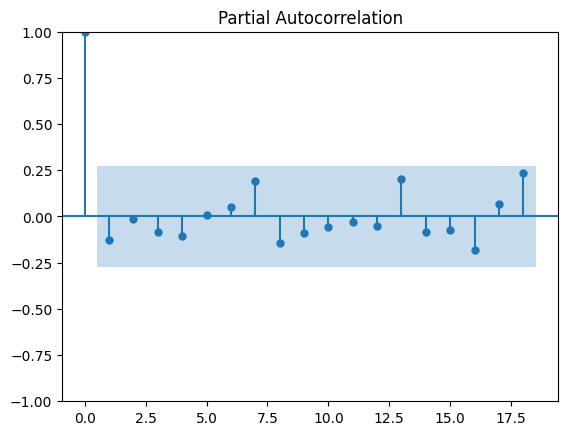

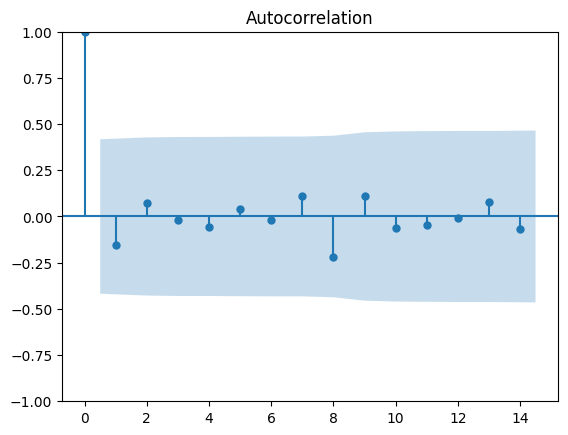

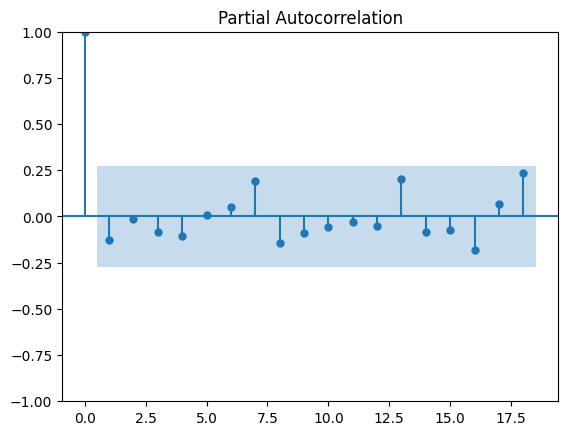

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot=acf(df['Weekly_Sales'])
pacf_plot=pacf(df['Weekly_Sales'], nlags=50)
plot_acf(acf_plot)
plot_pacf(pacf_plot)

In [ ]:
print(df.shape)
train = df.iloc[:-12]['Weekly_Sales']
test = df.iloc[-12:]['Weekly_Sales']
print(train.shape,test.shape)

(154, 2)
(142,) (12,)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
Model = ARIMA(df['Weekly_Sales'], order=(1,1,1))
Model_fit = Model.fit()

In [ ]:
df['pred'] = Model_fit.predict(start= len(train), end=len(train)+len(test)- 1, dynamic=True)
df
#predict = Model_fit.predict(start= len(train),end=len(train)+len(test)- 1,dynamic=True)
#df[['Weekly_Sales','pred']].plot(figsize=(15,7))

,Weekly_Sales,Week,pred
Date,,,
2010-01-10,42239875.87,45,NaN
2010-01-17,0.00,0,NaN
2010-01-24,0.00,0,NaN
2010-01-31,0.00,0,NaN
2010-02-07,99341315.76,450,NaN
...,...,...,...
2012-11-18,0.00,0,4.509513e+07
2012-11-25,0.00,0,4.509513e+07
2012-12-02,0.00,0,4.509513e+07


<Axes: xlabel='Date'>

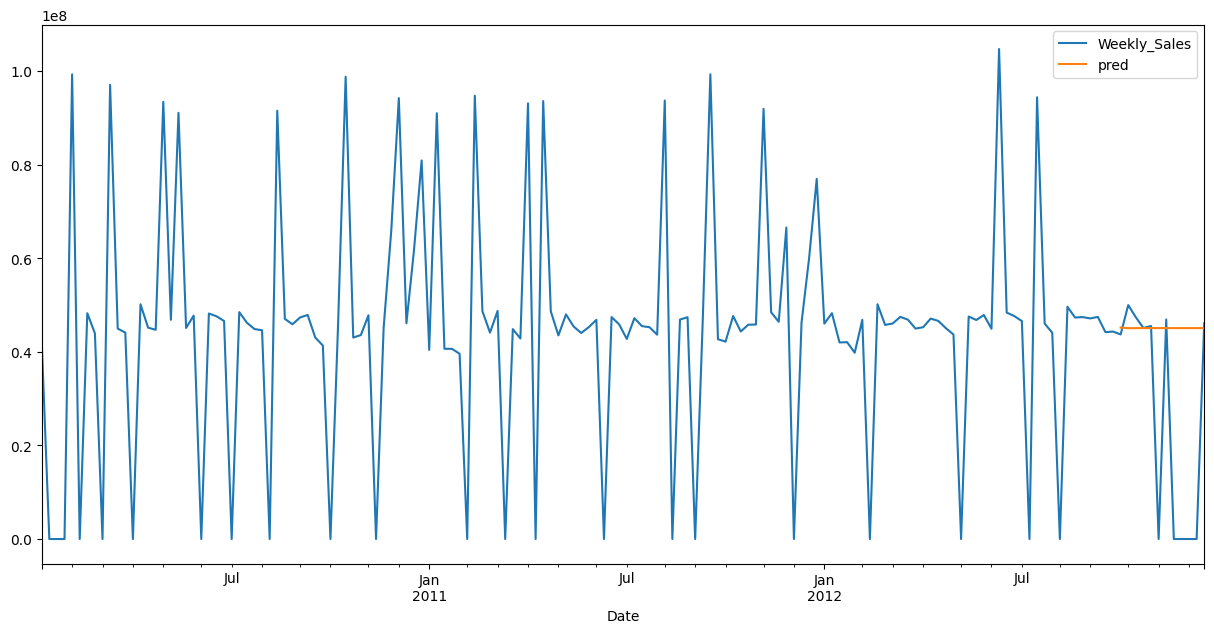

In [ ]:
df[['Weekly_Sales','pred']].plot(figsize=(15,7))

In [ ]:
# Evaluate the performance of the model using RMSE and R2 SCORE

from sklearn.metrics import mean_squared_error ,r2_score
rmse = np.sqrt(mean_squared_error(predict,test))
print('RMSE OF ARIMA MODEL: ',rmse)
print('ACCURACY OF ARIMA MODEL:',r2_score(test,predict))

RMSE OF ARIMA MODEL:  29160842.36288688
ACCURACY OF ARIMA MODEL: -0.6181887421232017


# TIME-SERIES FORECASTING

Time series forecasting is a statistical technique used to predict future values based on previously observed values in a time series dataset. This is an implementation of time series forecasting using SARIMAX model.

The first step is to split the data into training and test sets using iloc function. The training set contains all the data except the last 24 observations while the test set contains only the last 24 observations.

The next step is to select the endogenous variable (i.e., the variable to be forecasted) which is 'Weekly_Sales' in this case.

The SARIMAX model is then fitted to the training data. The order parameter specifies the order of the autoregressive, differencing, and moving average components while the seasonal_order parameter specifies the order of the seasonal components.

The forecast() method is then used to forecast the future sales for the next 12 weeks. Finally, the performance of the model is evaluated using root mean squared error (RMSE).

# SARIMAX MODEL

In [ ]:
print(df.shape)
train = df.iloc[:-12]['Weekly_Sales']
test = df.iloc[-12:]['Weekly_Sales']
print(train.shape,test.shape)

(154, 3)
(142,) (12,)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,52))
result = model.fit()

<Axes: xlabel='Date'>

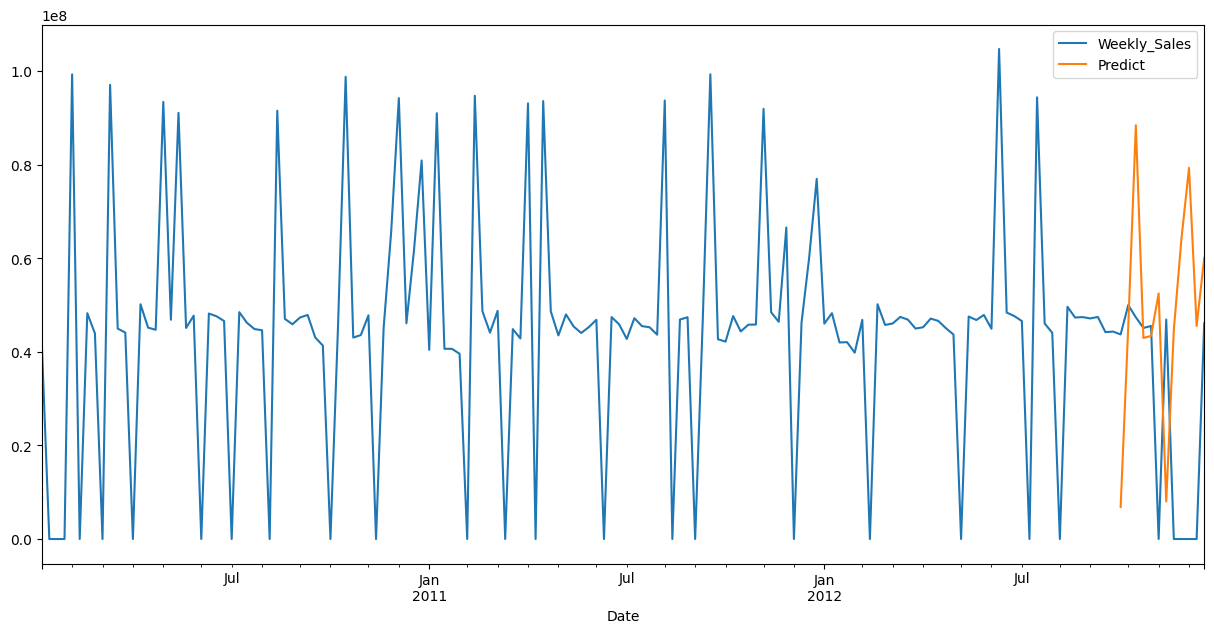

In [ ]:
df['Predict'] = result.predict(start= len(train),
                                    end=len(train)+len(test)- 1,
                                    dynamic=True)

df[['Weekly_Sales','Predict']].plot(figsize=(15,7))

<Axes: xlabel='Date'>

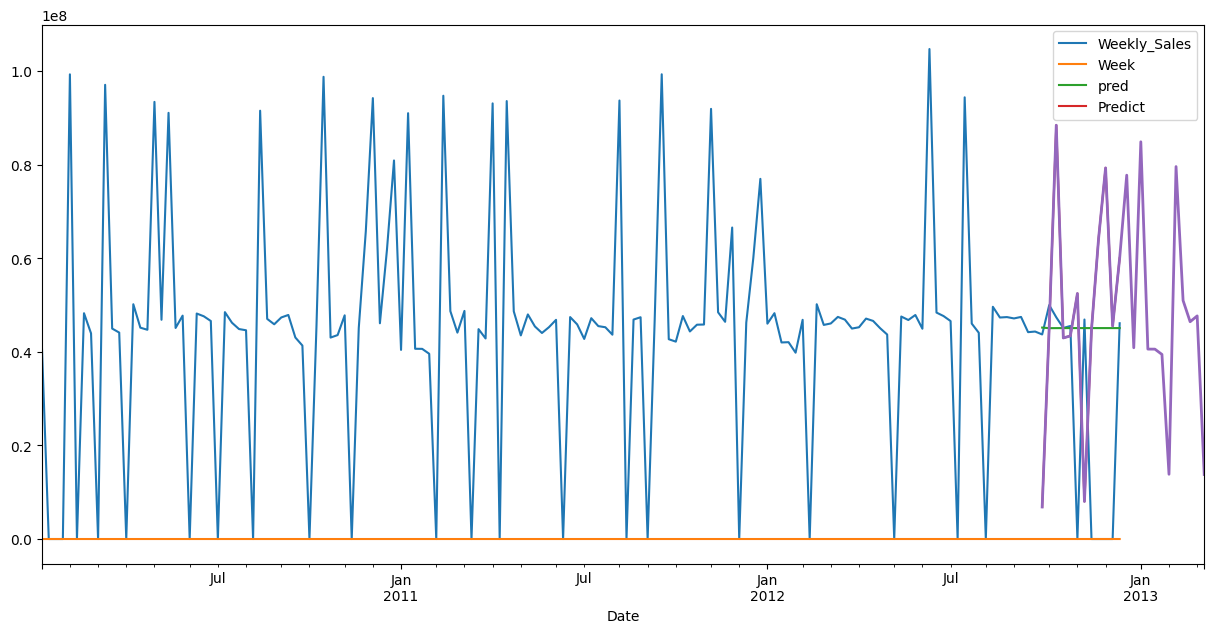

In [ ]:
#predicting the projections for the next 12 weeks
forecast = result.forecast(steps=24)

df.plot(figsize=(15,7))
forecast.plot(figsize=(15,7),linewidth=2)

In [ ]:
df.tail(2)

,Weekly_Sales,Week,pred,Predict
Date,,,,
2012-12-09,0.00,0,4.509513e+07,4.553919e+07
2012-12-16,46128514.25,2250,4.509513e+07,6.008036e+07


In [ ]:
forecast

2012-09-30    6.848758e+06
2012-10-07    4.536484e+07
2012-10-14    8.846621e+07
2012-10-21    4.298278e+07
2012-10-28    4.342540e+07
2012-11-04    5.249379e+07
2012-11-11    8.026799e+06
2012-11-18    4.474382e+07
2012-11-25    6.414799e+07
2012-12-02    7.934524e+07
2012-12-09    4.553919e+07
2012-12-16    6.008036e+07
2012-12-23    7.778571e+07
2012-12-30    4.089350e+07
2013-01-06    8.492184e+07
2013-01-13    4.060231e+07
2013-01-20    4.059382e+07
2013-01-27    3.946082e+07
2013-02-03    1.384427e+07
2013-02-10    7.962393e+07
2013-02-17    5.098832e+07
2013-02-24    4.645404e+07
2013-03-03    4.770103e+07
2013-03-10    1.378875e+07
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [ ]:
# Evaluate the performance of the model using RMSE
from sklearn.metrics import mean_squared_error,r2_score

rmse = np.sqrt(mean_squared_error( forecast,test))
print('RMSE OF SARIMAX :',rmse)
print('ACCURACY OF SARIMAX MODEL:',r2_score(forecast,test))

RMSE OF SARIMAX : 42843927.84882091
ACCURACY OF SARIMAX MODEL: -2.438841926764389


The output shows the forecasted sales values for the next 12 weeks (i.e., the predicted mean,after Date of 2012-12-16) and the root mean squared error (RMSE) of the forecasted values compared to the actual values in the test set. An RMSE of  40958168.174435884 indicates that the forecasted values are, on average, about  40958168.174435884 units away from the actual values.



# FB Prophet Forecasting Library

Prophet, or “Facebook Prophet,” is an open-source library for univariate (one variable) time series forecasting developed by Facebook.

Prophet implements what they refer to as an additive time series forecasting model, and the implementation supports trends, seasonality, and holidays.

Implements a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

# Fit Prophet Model

To use Prophet for forecasting, first, a Prophet() object is defined and configured, then it is fit on the dataset by calling the fit() function and passing the data.

The Prophet() object takes arguments to configure the type of model you want, such as the type of growth, the type of seasonality, and more. By default, the model will work hard to figure out almost everything automatically.

The fit() function takes a DataFrame of time series data. The DataFrame must have a specific format. The first column must have the name ‘ds‘ and contain the date-times. The second column must have the name ‘y‘ and contain the observations.

This means we change the column names in the dataset. It also requires that the first column be converted to date-time objects, if they are not already.

In [ ]:
 #read csv data file again for FbProphet model
 from google.colab import files
uploaded = files.upload()

Saving Walmart_Store_sales.csv to Walmart_Store_sales (1).csv


In [ ]:
df1 = pd.read_csv(io.BytesIO(uploaded['Walmart_Store_sales (1).csv']))
print('Shape of Data',df1.shape)
df1.head()

Shape of Data (6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Convert the Date column to proper datetime data format
df1['Date'] = pd.to_datetime(df1['Date'])
df1.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667


In [ ]:
# modify dataset into a specific(prophet modelling) format

df1 = df1.drop(columns=['Store','Holiday_Flag', 'Temperature','Fuel_Price', 'CPI', 'Unemployment'])
df1 = df1.rename(columns = {'Date':'ds', 'Weekly_Sales':'y'}) # prepare expected column names
df1=df1.dropna()
df1

,ds,y
0,2010-05-02,1643690.90
1,2010-12-02,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-05-03,1554806.68
...,...,...
6430,2012-09-28,713173.95
6431,2012-05-10,733455.07
6432,2012-12-10,734464.36
6433,2012-10-19,718125.53


In [ ]:
y_train = df1.iloc[:120]
y_test = df1.iloc[120:]

In [ ]:
from prophet import Prophet
model = Prophet()
#model.fit(df1)
model.fit(y_train)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn_z232qe/mmmocbqe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn_z232qe/sz8hbtok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9873', 'data', 'file=/tmp/tmpn_z232qe/mmmocbqe.json', 'init=/tmp/tmpn_z232qe/sz8hbtok.json', 'output', 'file=/tmp/tmpn_z232qe/prophet_modelo4uqzr0g/prophet_model-20230803133053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:30:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:30:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


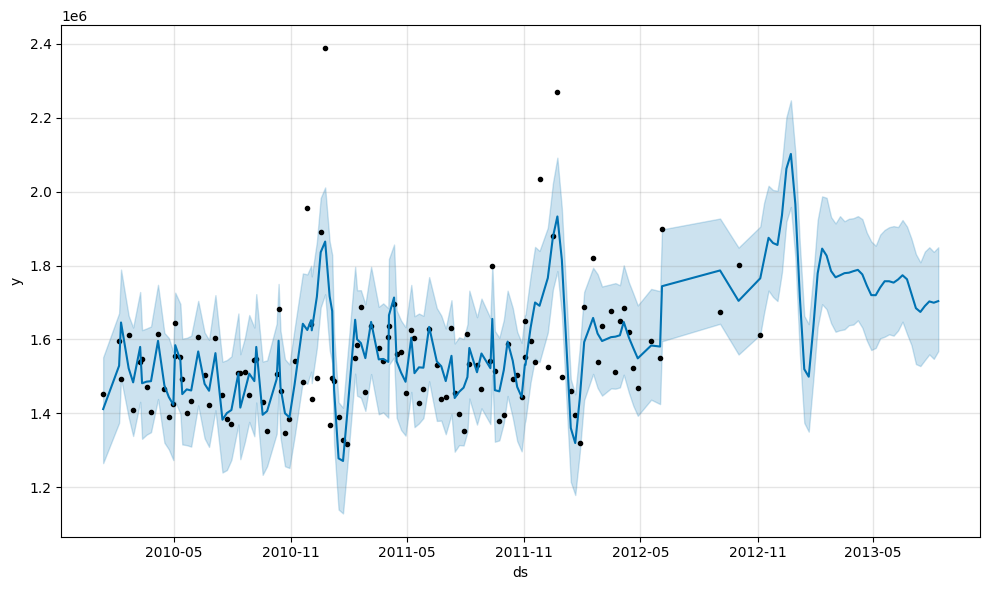

In [ ]:
future_dates = model.make_future_dataframe(periods = 40, freq='W')
Forecast = model.predict(future_dates)

model.plot(Forecast);

#Linear Regression Modelling

A linear regression model is trained using the training data, and the model is used to make predictions on the test set. The root mean squared error (RMSE) is calculated as a measure of the model's performance.

In [ ]:
x=df[['CPI','Unemployment','Fuel_Price','Temperature','Holiday_Flag','Store']]
y=df['Weekly_Sales']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
predictions = lm.predict(x_test)

In [ ]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('ACCURACY OF LinearRegression MODEL:',metrics.r2_score(y_test,predictions))

RMSE: 529835.5375908588
ACCURACY OF LinearRegression MODEL: 0.1516464568231758


We have seen that normal running of Linear regression is a very bad idea and doesn't make any sense. Now its time to go on with feature selection.

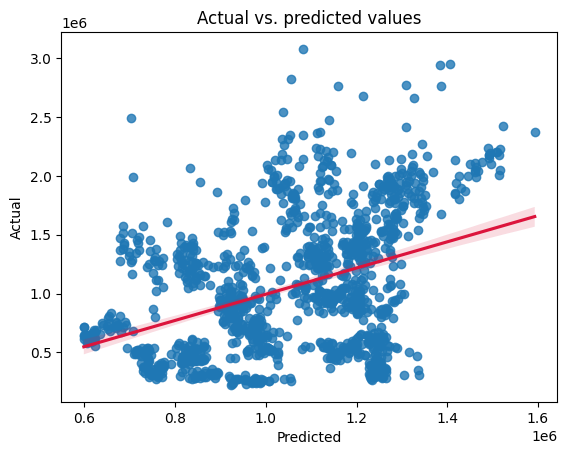

In [ ]:
# Check the linearity assumption
sns.regplot(x=predictions, y=y_test, line_kws={'color': 'crimson'})
plt.title('Actual vs. predicted values')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This creates a scatter plot with a regression line to visualize the relationship between the predicted and actual weekly sales values. The sns.regplot function is used to create the plot, which takes in the predicted values (x axis) and actual values (y axis) as inputs, and adds a regression line to show the linear relationship between the two.This plot is useful to check whether the linear regression model has a good fit on the test data and to visually inspect the linearity assumption, i.e., whether the predicted values follow a straight line with the actual values.

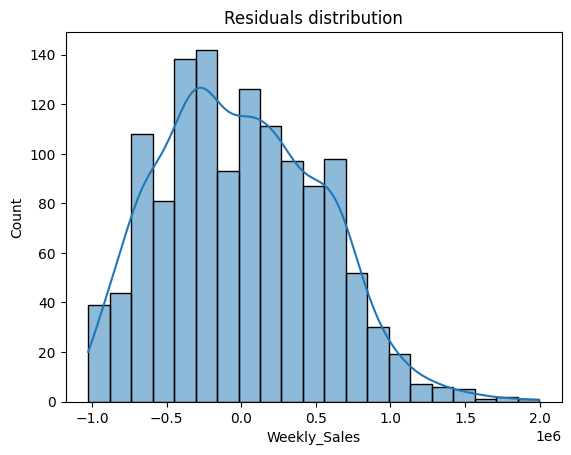

In [ ]:
# Check the normality of residuals assumption
residuals = y_test - predictions
sns.histplot(residuals, kde=True)
plt.title('Residuals distribution')
plt.show()

This code is checking the normality assumption of the residuals in linear regression. It first calculates the residuals as the difference between the actual (y_test) and predicted (y_pred) values. Then it creates a histogram of the residuals using the seaborn library, with a kernel density estimate (kde) overlay to show the shape of the distribution. The assumption of normality is important because if the residuals are not normally distributed, it indicates that the model may not be capturing all the important predictors or there may be some non-linear relationships in the data that are not accounted for.

From the above bar plot of the coefficients,we can see which features have the most impact on the target variable.

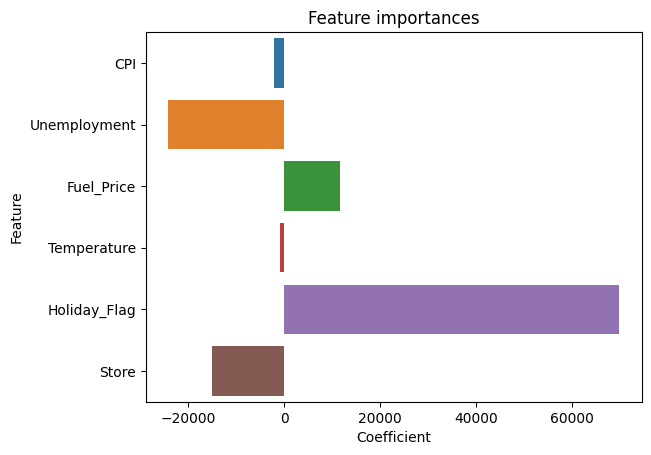

In [ ]:

coefficients = pd.DataFrame({'Feature': x.columns, 'Coefficient': lm.coef_})
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature importances')
plt.show()

# Conclusion & Recommendation

1.Size of the store is the highest contributing predictor in the model out of all.

2.Each store has a unique prediction power. They can be separately analyzed to get prediction for each individual store.

3.The Sales are very high during November and December and go down in January. So its better to employee more staff as casual employee in November and December and encourage permanent staff to take leaves during January.

4.The predicted sales data can be used to analyse the sales pattern and accordingly adjust the staff in the store.

5.The low selling stores should look forward to increasing their size and capacity to store more items and consumer products.

6.Special discount coupons can be distributed during low selling periods to attract more customers.

7.Sales are likely to fluctuate during holidays. Special offers can be given during festive season accompanied with suitable marketing to keep the sales high during holidays as well.

THANK YOU